# Data visualization with `plotnine`

## Load packages

In [46]:
import palmerpenguins # https://github.com/mcnakhaee/palmerpenguins
import plotnine
import numpy as np  
import pandas

## Load data

In [47]:
from plotnine import *
from pandas import *
from plotnine.data import *
from palmerpenguins import load_penguins
penguins = load_penguins()


## Observe penguins dataset


In [3]:
# Return the first part of the dataset
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins.shape ## To view the dimensions of the datset

(344, 8)

In [5]:
# Retrieve column names
list(penguins.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

## Obtain basic information about the dataset

In [6]:
#Basic information
penguins.info() # categorical variables data type is Object



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [7]:
#Describe the data

penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
# How many unique values are there in each column
penguins.nunique(axis=0)

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

In [9]:
# Check for `nans` in each column
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [10]:
# print missing values columns
penguins[penguins.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [11]:
## Extract categorical variables and numerical variables separately
cats = list(penguins.select_dtypes(include=['object']).columns)
nums = list(penguins.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['species', 'island', 'sex']
numerical variables:  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


In [12]:
penguins.describe()  

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [14]:
penguins.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.504878,14.982114,217.186992,5076.016260,2008.080645


In [18]:
penguins.groupby('species').describe(include=[np.number])

bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                bill_depth_mm             ... body_mass_g           year  \
            max         count       mean  ...         75%     max  count   
species                                   ...                              
Adelie     46.0         151.0  18.346358  ...      4000.0  4775.0  152.0   
Chinstrap  58.0          68.0  18.420588  ...      3950.0  4800.0   68.0   
Gentoo     59.6         123.0  14.982114  ...      5500.0  6300.0  124.0   

                                                                          
                  mean       std     min     25%     50%     75%     max  
species                                                                   
Adelie     2008.013158  0.821780  2007.0  2007.0  2008.0  2009.0  2009.0  
Chinstrap  2007.970588  0.863360  2007.0  2007.0  2008.0  2009.0  2009.0  
Gentoo     2008.080645  0.792206  2007.0  2007.0  2008.0  2009.0  2009.0  

[3 rows x 40 columns]

In [17]:
penguins.groupby('species').describe(include=[np.float]) # this removes year variable

bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                bill_depth_mm             ... flipper_length_mm         \
            max         count       mean  ...               75%    max   
species                                   ...                            
Adelie     46.0         151.0  18.346358  ...             195.0  210.0   
Chinstrap  58.0          68.0  18.420588  ...             201.0  212.0   
Gentoo     59.6         123.0  14.982114  ...             221.0  231.0   

          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
species                                                                  
Adelie          151.0  3700.662252  458.566126  2850.0  3350.0  3700.0   
Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
Gentoo          123.0  5076.016260  504.116237  3950.0  4700.0  5000.0   

                           
              75%     max  
species                    
Adelie     4000.0  4775.0  
Chinstrap  3950.0  4800.0  
Gentoo     5500.0  6300.0  

[3 rows x 32 columns]

In [13]:
print(penguins.groupby('species').describe())  

          bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                bill_depth_mm             ... body_mass_g           year  \
            max         count       mean  ...         75%     max  count   
species                                   ...                              
Adelie     46.0         151.0  18.346358  ...      4000.0  4775.0  152.0   
Chinstrap  58.0          68.0  18.420588  ...      3950.0  4800.0   68.0   
Gentoo     59.6         123.0  14.982114  ...      5500.0  6300.0  124.0   

                                                                          
     

# Data Visualization

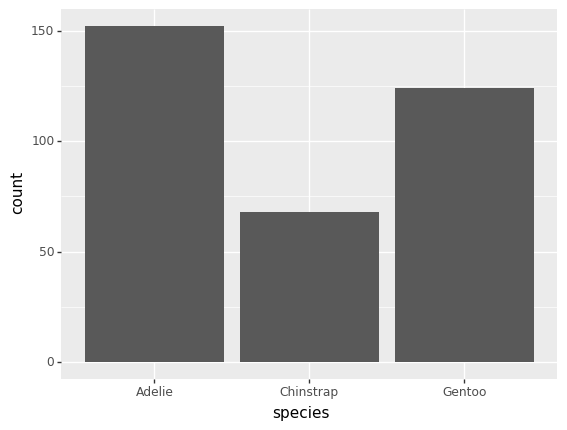

<ggplot: (7555409942)>

In [20]:
## Barchart
ggplot(penguins)+aes(x="species")+geom_bar()

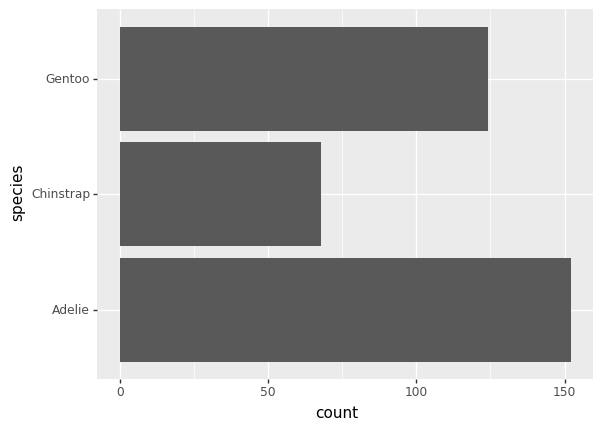

<ggplot: (-9223372029298543100)>

In [22]:
ggplot(penguins, aes(x="species"))+geom_bar() + coord_flip()

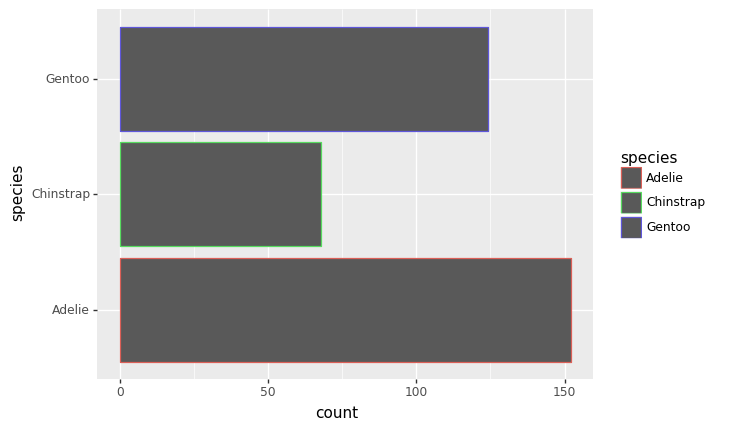

<ggplot: (7556351622)>

In [24]:
ggplot(penguins, aes(x="species", color="species"))+geom_bar() + coord_flip()

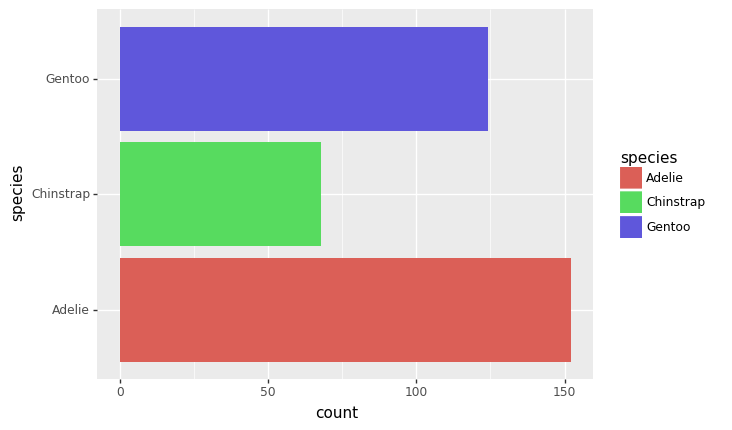

<ggplot: (-9223372029298517423)>

In [25]:
ggplot(penguins, aes(x="species", fill="species"))+geom_bar() + coord_flip()

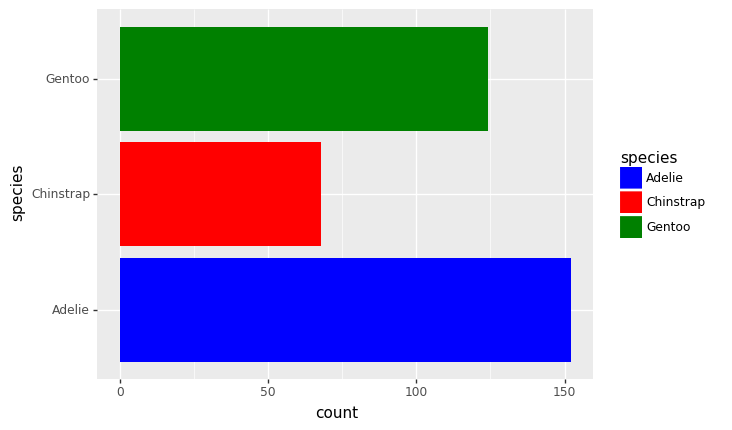

<ggplot: (7557077312)>

In [38]:
ggplot(penguins, aes(x="species", fill="species"))+ geom_bar() + coord_flip() + scale_fill_manual(values=['blue','red','green'])

## Proportions

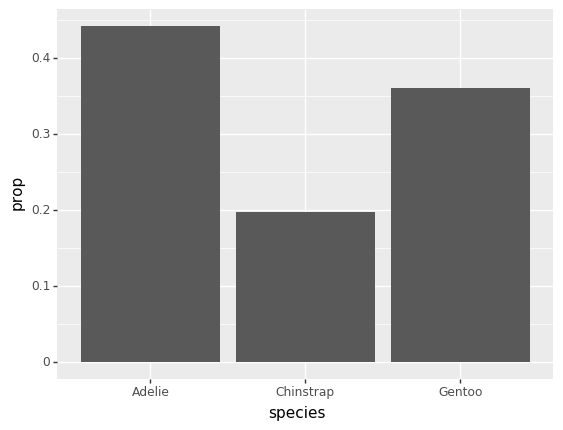

<ggplot: (7556258403)>

In [55]:
ggplot(data=penguins) + geom_bar(mapping=aes(x="species", y="..prop..", group=1))

### stat="identity"

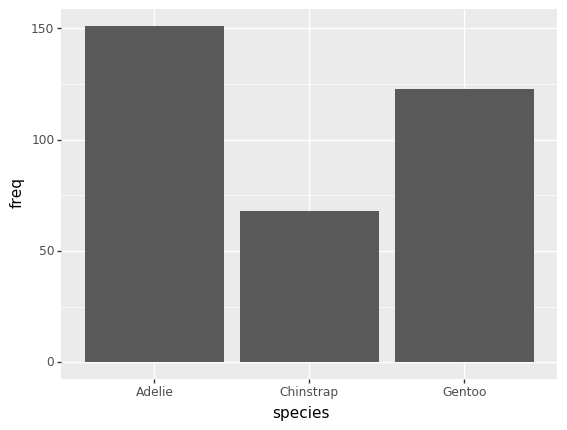

<ggplot: (-9223372029297564668)>

In [58]:
pencounts = DataFrame({"species": ["Adelie", "Chinstrap", "Gentoo"],
                     "freq": [151, 68, 123]})
pencounts

ggplot(data=pencounts) + geom_bar(mapping=aes(x="species", y="freq"), stat="identity")

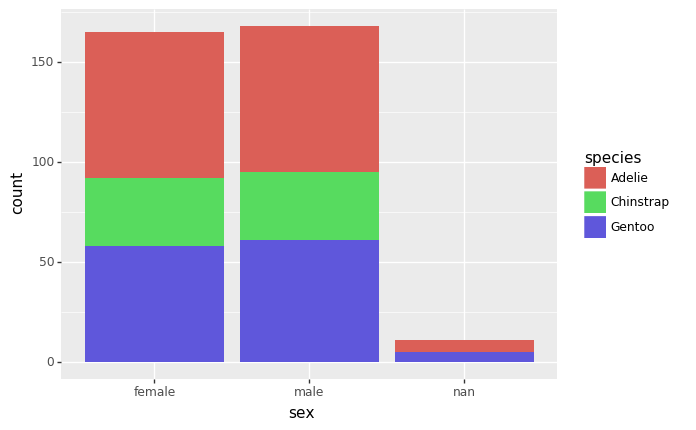

<ggplot: (-9223372029297561575)>

In [66]:
ggplot(data=penguins) + geom_bar(mapping=aes(x="sex", fill="species"))

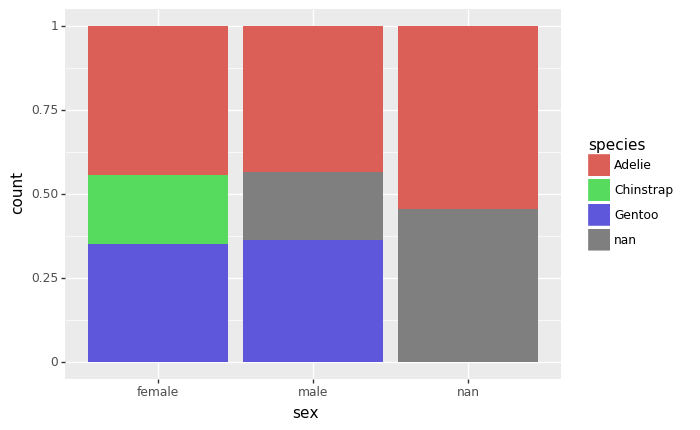

<ggplot: (7558118664)>

In [68]:
ggplot(data=penguins) + geom_bar(mapping=aes(fill="species", x="sex"), position="fill")

## Scatterplot

//anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


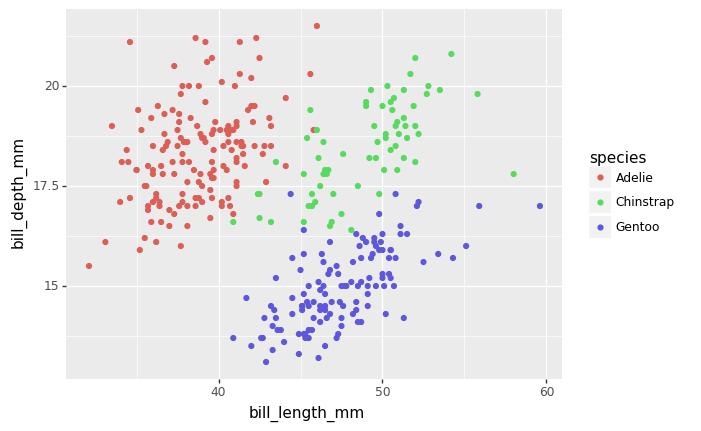

<ggplot: (-9223372029298204640)>

In [40]:
ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm", color="species")) + geom_point()

//anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


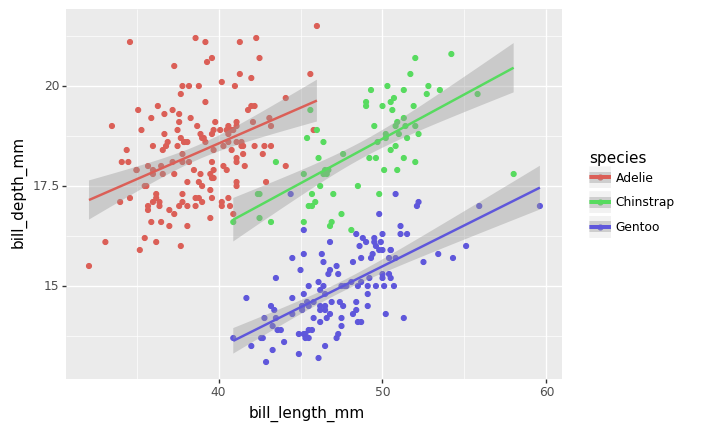

<ggplot: (7556232936)>

In [41]:
ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm", color="species")) + geom_point() + geom_smooth(method="lm")

## Boxplot

//anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


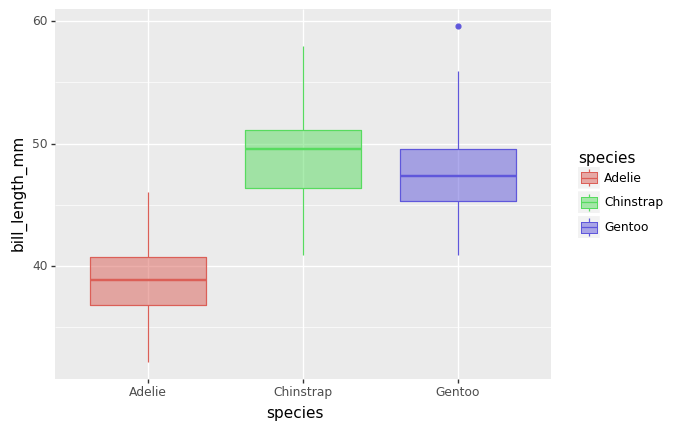

<ggplot: (7556258466)>

In [44]:
ggplot(penguins, aes(y="bill_length_mm", x="species", color="species", fill="species")) + geom_boxplot(alpha=0.5)

//anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


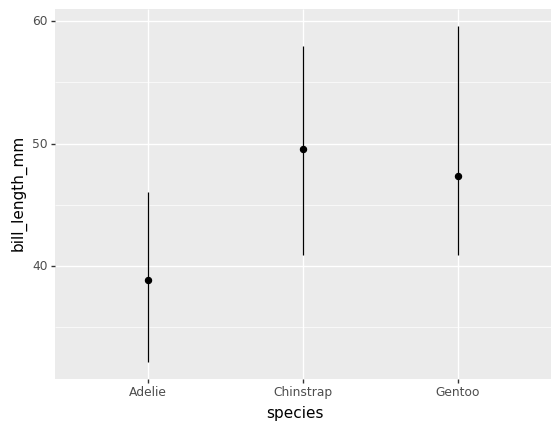

<ggplot: (7557215005)>

In [60]:
ggplot(data=penguins) +\
stat_summary(
    mapping=aes(x="species", y="bill_length_mm"),
    fun_ymin=np.min, # np is used to denote NumPy
    fun_ymax=np.max,
    fun_y=np.median
)